In [45]:
#Import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#date-parsing
from datetime import datetime

In [46]:
#load data:

filepath = r'C:\Users\nuzwa\Downloads\EV_Charging_Grid_Optimization_Categorical.csv'
ev_df = pd.read_csv(filepath, parse_dates=['timestamp'])

In [47]:
#Checkpoint:
ev_df.head(3)
ev_df.info()
ev_df.describe(include='all')
ev_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    1000 non-null   datetime64[ns]
 1   station_id                   1000 non-null   int64         
 2   location                     1000 non-null   object        
 3   charging_type                1000 non-null   object        
 4   num_chargers                 1000 non-null   int64         
 5   voltage_level                1000 non-null   float64       
 6   current_flow                 1000 non-null   float64       
 7   power_consumed               1000 non-null   float64       
 8   power_loss                   1000 non-null   float64       
 9   voltage_fluctuation          1000 non-null   float64       
 10  ev_id                        1000 non-null   int64         
 11  battery_capacity             1000 non-null  

timestamp                      0
station_id                     0
location                       0
charging_type                  0
num_chargers                   0
voltage_level                  0
current_flow                   0
power_consumed                 0
power_loss                     0
voltage_fluctuation            0
ev_id                          0
battery_capacity               0
charging_time                  0
charging_power                 0
charging_cost                  0
predicted_power_demand         0
optimized_charging_power       0
grid_stability_score           0
reduced_power_loss_category    0
voltage_stability_category     0
dtype: int64

In [48]:
#Cleaning & convert of data:
ev_df['timestamp'] = pd.to_datetime(ev_df['timestamp'], errors = 'coerce')
ev_df['location'] = ev_df['location'].astype('category')
ev_df['charging_type'] = ev_df['charging_type'].astype('category')
ev_df['reduced_power_loss_category'] = ev_df['reduced_power_loss_category'].astype('category')
ev_df['voltage_stability_category'] = ev_df['voltage_stability_category'].astype('category')

In [49]:
#checkpoint
print(ev_df.head(2))
print(ev_df['timestamp'].unique())
print(ev_df.info())

            timestamp  station_id  location charging_type  num_chargers  \
0 2024-01-01 00:00:00           7  Suburban           V2G             3   
1 2024-01-01 00:15:00          15     Rural  Conventional             4   

   voltage_level  current_flow  power_consumed  power_loss  \
0     243.194256     10.925605        2.657044    2.152952   
1     235.538816     74.444498       17.534569    2.344340   

   voltage_fluctuation  ev_id  battery_capacity  charging_time  \
0             2.103120   4523         55.094776      37.729495   
1             9.699106   1904         63.260600      52.364641   

   charging_power  charging_cost  predicted_power_demand  \
0       21.448731       1.991531                3.032166   
1       16.695066       2.151447               17.902533   

   optimized_charging_power  grid_stability_score reduced_power_loss_category  \
0                  3.028269              0.100286                      Medium   
1                 18.606271              0.33

In [50]:
#treatment for duplicate removal and handling of missing data

#dropping duplicates
ev_df.drop_duplicates(inplace=True)

#dropping na/empty rows for values within these 3 columns
ev_df.dropna(subset=['timestamp', 'station_id', 'power_consumed'], inplace=True)

#filling empty grid_stability_score rows with the mean
ev_df['grid_stability_score'].fillna(ev_df['grid_stability_score'].mean(), inplace=True)

C:\Users\nuzwa\AppData\Local\Temp\ipykernel_17976\3704395539.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_df['grid_stability_score'].fillna(ev_df['grid_stability_score'].mean(), inplace=True)


In [51]:
#Adding new datetime features to dataset, useful for future machine learning modelling and 

ev_df['hour'] = ev_df['timestamp'].dt.hour
ev_df['day'] = ev_df['timestamp'].dt.day
ev_df['weekday'] = ev_df['timestamp'].dt.day_name()
ev_df['date'] = ev_df['timestamp'].dt.date

In [52]:
#checkpoint:
ev_df.info()
ev_df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    1000 non-null   datetime64[ns]
 1   station_id                   1000 non-null   int64         
 2   location                     1000 non-null   category      
 3   charging_type                1000 non-null   category      
 4   num_chargers                 1000 non-null   int64         
 5   voltage_level                1000 non-null   float64       
 6   current_flow                 1000 non-null   float64       
 7   power_consumed               1000 non-null   float64       
 8   power_loss                   1000 non-null   float64       
 9   voltage_fluctuation          1000 non-null   float64       
 10  ev_id                        1000 non-null   int64         
 11  battery_capacity             1000 non-null  

,timestamp,station_id,location,charging_type,num_chargers,voltage_level,current_flow,power_consumed,power_loss,voltage_fluctuation,...,charging_cost,predicted_power_demand,optimized_charging_power,grid_stability_score,reduced_power_loss_category,voltage_stability_category,hour,day,weekday,date
0,2024-01-01 00:00:00,7,Suburban,V2G,3,243.194256,10.925605,2.657044,2.152952,2.103120,...,1.991531,3.032166,3.028269,0.100286,Medium,Excellent,0,1,Monday,2024-01-01
1,2024-01-01 00:15:00,15,Rural,Conventional,4,235.538816,74.444498,17.534569,2.344340,9.699106,...,2.151447,17.902533,18.606271,0.336108,Medium,Moderate,0,1,Monday,2024-01-01
2,2024-01-01 00:30:00,11,Suburban,V2G,2,230.442868,73.562155,16.951874,1.357571,4.802392,...,6.985057,17.082844,16.300964,0.379212,Low,Excellent,0,1,Monday,2024-01-01


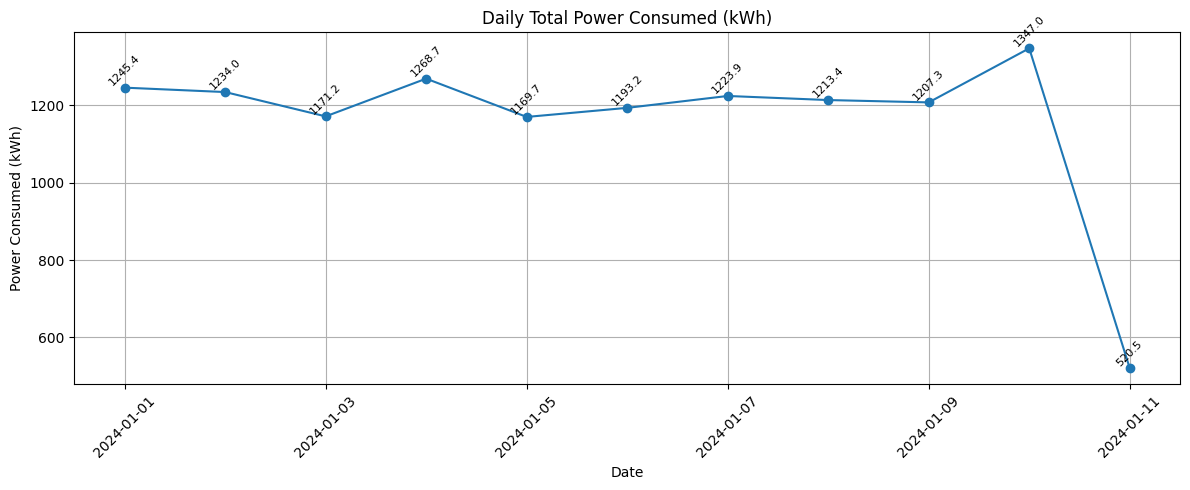

In [53]:
#EDA 1: Power Consumption Trends
daily_power = ev_df.groupby('date')['power_consumed'].sum()



# Plot
plt.figure(figsize=(12,5))
ax = daily_power.plot(title="Daily Total Power Consumed (kWh)", marker='o')  # add markers for clarity
plt.ylabel("Power Consumed (kWh)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)

# Add value labels
for x, y in zip(daily_power.index, daily_power.values):
    ax.text(x, y + 0.5, f'{y:.1f}', ha='center', va='bottom', fontsize=8, rotation=45)

plt.tight_layout()
plt.show()



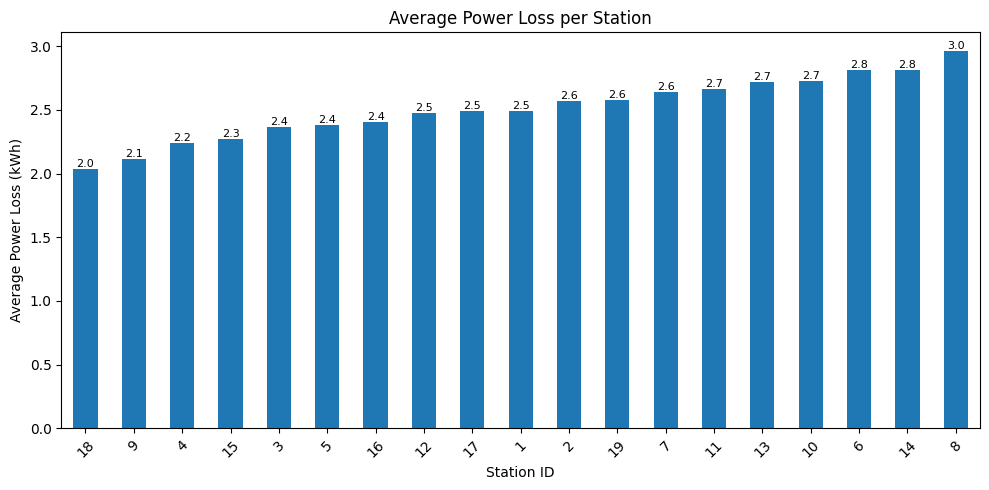

In [54]:
#EDA: Mean Power loss by Station
station_loss = ev_df.groupby('station_id')['power_loss'].mean().sort_values(ascending=True)

plt.figure(figsize=(10,5))
ax = station_loss.plot(kind='bar', title="Average Power Loss per Station")

# Add value labels
for x, y in enumerate(station_loss.values):
    ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8)

plt.ylabel("Average Power Loss (kWh)")
plt.xlabel("Station ID")
plt.xticks(ticks=range(len(station_loss.index)), labels=station_loss.index, rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Grid Stability Score by Charging Type')

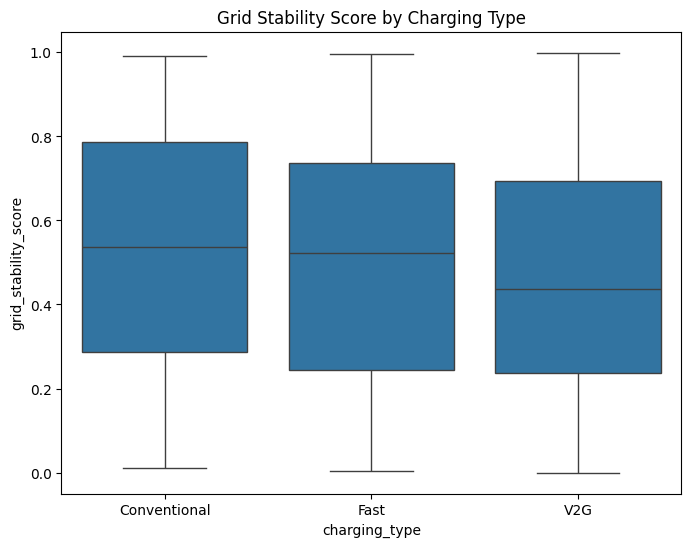

In [55]:
#Charging Type vs Grid Stability:
plt.figure(figsize=(8,6))
sns.boxplot(x='charging_type', y='grid_stability_score', data=ev_df)
plt.title("Grid Stability Score by Charging Type")

Text(0.5, 1.0, 'Correlation Matrix')

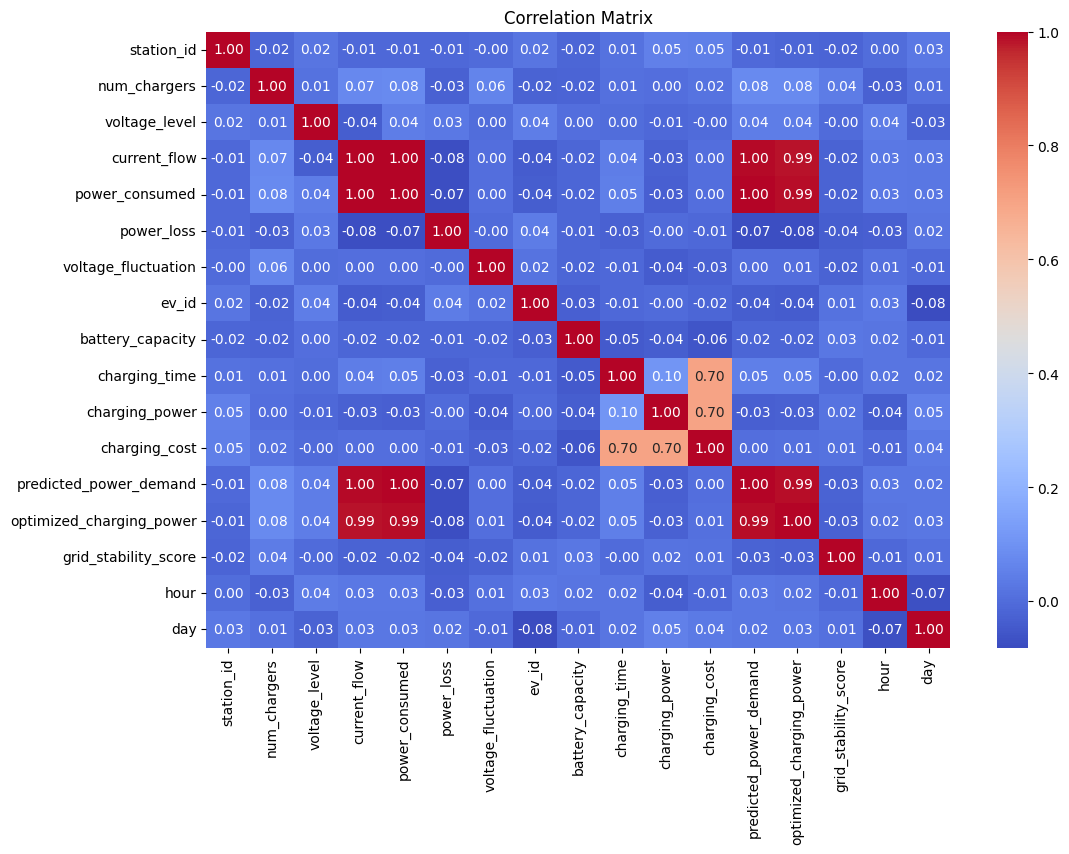

In [56]:
#heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(ev_df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")

Text(0, 0.5, 'Optimized Charging Power')

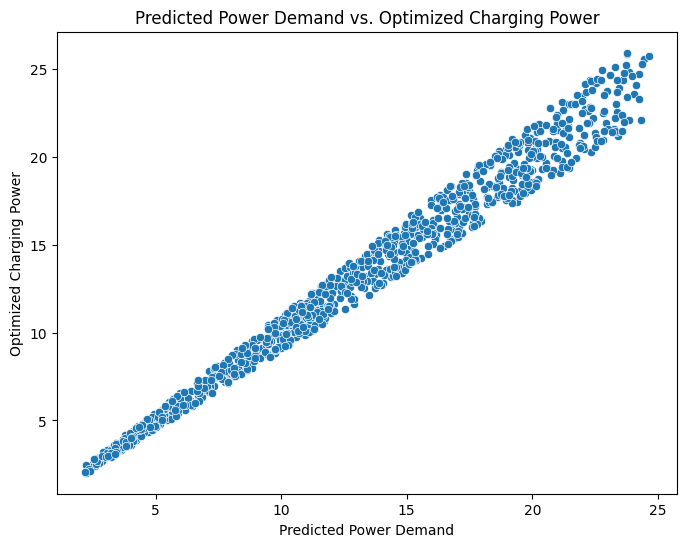

In [57]:
#Power Demand Vs Optimised Power
plt.figure(figsize=(8,6))
sns.scatterplot(x='predicted_power_demand', y='optimized_charging_power', data=ev_df)
plt.title("Predicted Power Demand vs. Optimized Charging Power")
plt.xlabel("Predicted Power Demand")
plt.ylabel("Optimized Charging Power")

In [58]:
#Can we predict the optimized_charging_power for each charging session to minimize grid strain and power loss?
#Classification of voltage_stability_category (High, Medium, Low).
#Do we know predicted_power_demand before we decide optimized_charging_power

In [59]:
#Machine Learning Regression Problem statement:
#Can we predict optimised charging power based on station/EV characteristics, charging
#parameters, predicted demand?

In [60]:
#Checkpoint: 
ev_df.info()
ev_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    1000 non-null   datetime64[ns]
 1   station_id                   1000 non-null   int64         
 2   location                     1000 non-null   category      
 3   charging_type                1000 non-null   category      
 4   num_chargers                 1000 non-null   int64         
 5   voltage_level                1000 non-null   float64       
 6   current_flow                 1000 non-null   float64       
 7   power_consumed               1000 non-null   float64       
 8   power_loss                   1000 non-null   float64       
 9   voltage_fluctuation          1000 non-null   float64       
 10  ev_id                        1000 non-null   int64         
 11  battery_capacity             1000 non-null  

,timestamp,station_id,location,charging_type,num_chargers,voltage_level,current_flow,power_consumed,power_loss,voltage_fluctuation,...,charging_cost,predicted_power_demand,optimized_charging_power,grid_stability_score,reduced_power_loss_category,voltage_stability_category,hour,day,weekday,date
0,2024-01-01 00:00:00,7,Suburban,V2G,3,243.194256,10.925605,2.657044,2.152952,2.103120,...,1.991531,3.032166,3.028269,0.100286,Medium,Excellent,0,1,Monday,2024-01-01
1,2024-01-01 00:15:00,15,Rural,Conventional,4,235.538816,74.444498,17.534569,2.344340,9.699106,...,2.151447,17.902533,18.606271,0.336108,Medium,Moderate,0,1,Monday,2024-01-01
2,2024-01-01 00:30:00,11,Suburban,V2G,2,230.442868,73.562155,16.951874,1.357571,4.802392,...,6.985057,17.082844,16.300964,0.379212,Low,Excellent,0,1,Monday,2024-01-01


In [61]:
features = [
    'station_id',
    'location',
    'charging_type',
    'num_chargers',
    'voltage_level',
    'current_flow',
    'battery_capacity',
    'charging_time',
    'predicted_power_demand'
]

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define X and y
X = ev_df[features]
y = ev_df['optimized_charging_power']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing
categorical = ['location', 'charging_type']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
])

# Create pipeline
reg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location',
                                                   'charging_type']),
                                                 ('num', StandardScaler(),
                                                  ['station_id', 'num_chargers',
                                                   'voltage_level',
                                                   'current_flow',
                                                   'battery_capacity',
                                                   'charging_time',
                                                   'predicted_power_demand'])])),
                ('model', LinearRegression())])

In [63]:
y_pred = reg_pipeline.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 0.7913224998476789
R² Score: 0.9828499142531446


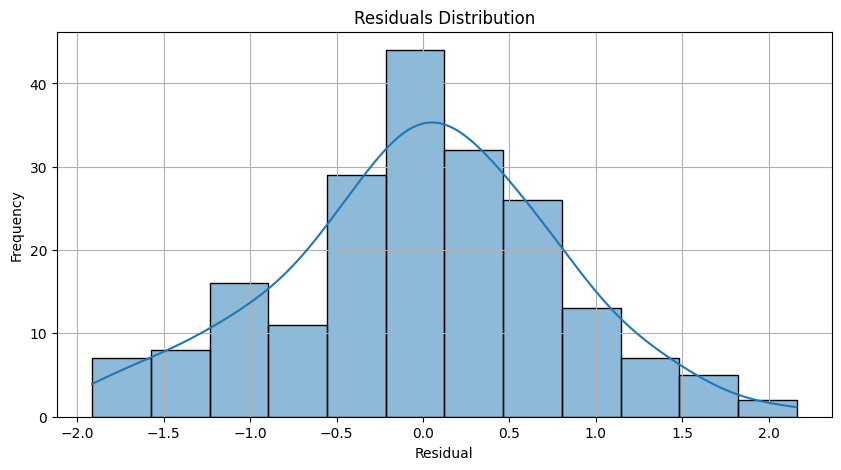

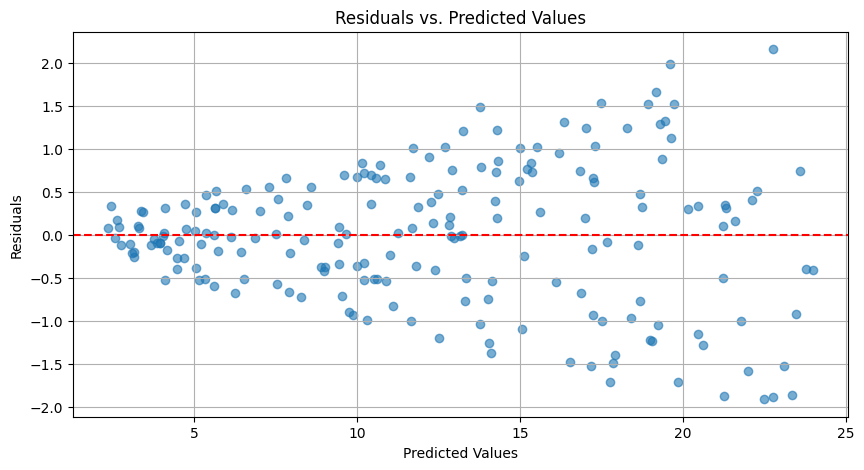

In [65]:
#Residual Analysis
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Residuals vs. predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [66]:
#cross-validation (5-fold)

from sklearn.model_selection import cross_val_score


# If using RandomForestRegressor, wrap with neg_mean_squared_error
cv_scores = cross_val_score(reg_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)


print("Cross-Validation RMSEs:", cv_rmse_scores)
print("Mean CV RMSE:", np.mean(cv_rmse_scores))

Cross-Validation RMSEs: [0.8476682  0.7922903  0.83813836 0.79839678 0.842752  ]
Mean CV RMSE: 0.8238491285181514


"""The RMSE values are fairly consistent across folds, which suggests that your model generalizes well and isn’t overfitting to one specific subset of the data.

The mean RMSE (≈0.82) is very close to your previous test RMSE (≈0.79), further confirming model stability.

""""


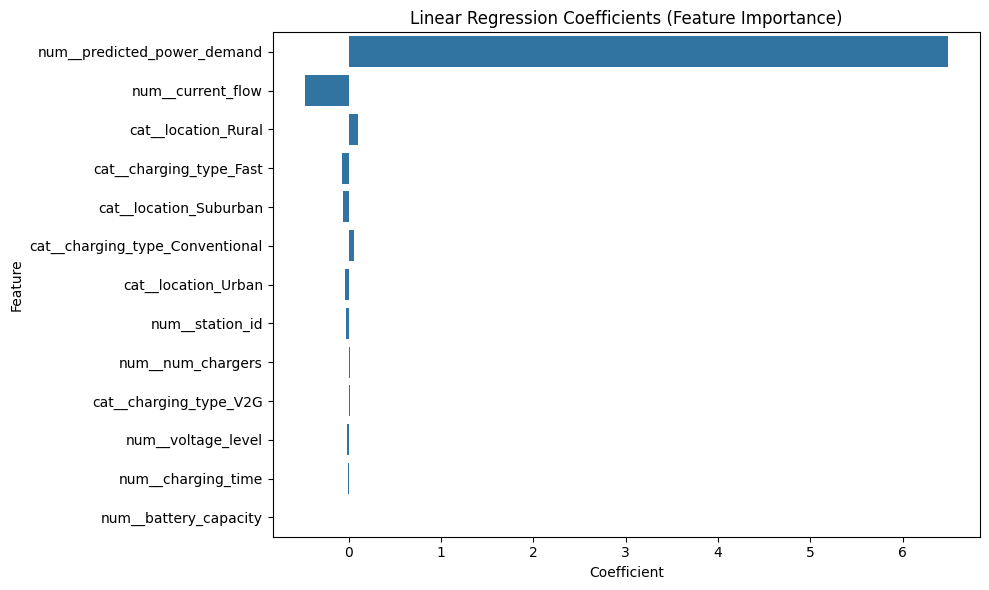

In [68]:
# Extract model after fitting
model = reg_pipeline.named_steps['model']
# Get feature names after preprocessing
feature_names = reg_pipeline.named_steps['preprocessing'].get_feature_names_out()
# Get coefficients
coefficients = model.coef_

# Combine into DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Linear Regression Coefficients (Feature Importance)")
plt.tight_layout()
plt.show()


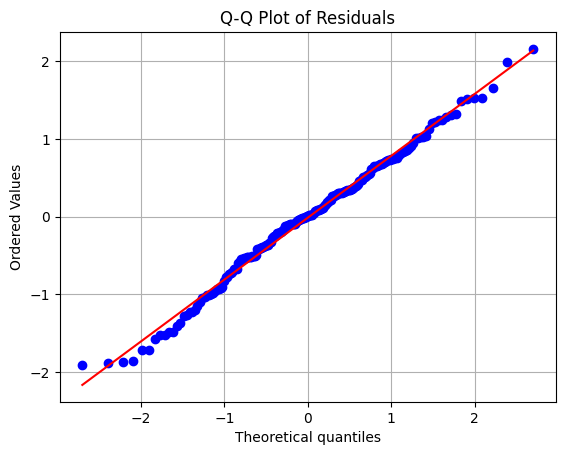

In [69]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

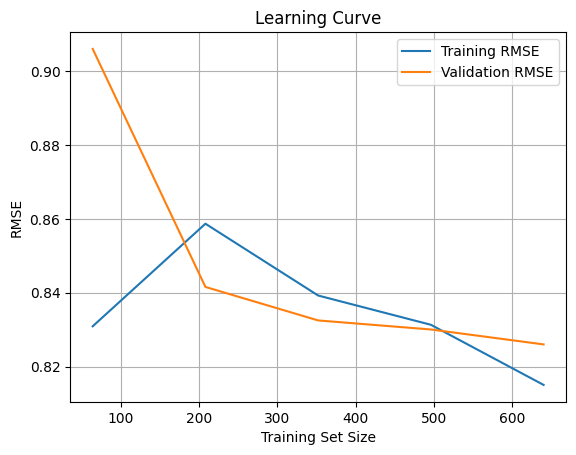

In [70]:
#Learning Curve
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    reg_pipeline, X_train, y_train,
    cv=5, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5),
    random_state=42
)

train_rmse = -train_scores.mean(axis=1)
test_rmse = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_rmse, label='Training RMSE')
plt.plot(train_sizes, test_rmse, label='Validation RMSE')
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

In [72]:
#Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Only use numerical columns for VIF calculation
X_num = X.select_dtypes(include=['float64', 'int64'])

# Scale before VIF
X_scaled = StandardScaler().fit_transform(X_num)

vif_data = pd.DataFrame()
vif_data["feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)


                  feature         VIF
0              station_id    1.003350
1            num_chargers    1.006779
2           voltage_level    2.693063
3            current_flow  278.634072
4        battery_capacity    1.003034
5           charging_time    1.005134
6  predicted_power_demand  278.832430


In [ ]:
""" The extremely high VIFs for current_flow and predicted_power_demand (> 10, especially > 100) indicate strong multicollinearity, which can destabilize coefficient estimates in linear models. 
"""

In [74]:
#Checkpoint
print(ev_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    1000 non-null   datetime64[ns]
 1   station_id                   1000 non-null   int64         
 2   location                     1000 non-null   category      
 3   charging_type                1000 non-null   category      
 4   num_chargers                 1000 non-null   int64         
 5   voltage_level                1000 non-null   float64       
 6   current_flow                 1000 non-null   float64       
 7   power_consumed               1000 non-null   float64       
 8   power_loss                   1000 non-null   float64       
 9   voltage_fluctuation          1000 non-null   float64       
 10  ev_id                        1000 non-null   int64         
 11  battery_capacity             1000 non-null  

In [75]:
#definition of efficiency metric
ev_df['efficiency_ratio'] = ev_df['optimized_charging_power'] / ev_df['charging_time']

#define threshold as efficiency above median

threshold = ev_df['efficiency_ratio'].median()
ev_df['efficient_session'] = (ev_df['efficiency_ratio'] > threshold).astype(int)

In [76]:
ev_df['efficient_session'].value_counts(normalize=True)

efficient_session
0    0.5
1    0.5
Name: proportion, dtype: float64

In [77]:
# Define target and features for classification
y_class = ev_df['efficient_session']

# Drop non-relevant or ID-like columns
drop_cols_class = ['timestamp', 'ev_id', 'charging_power', 'charging_cost', 'optimized_charging_power', 
                   'efficiency_ratio', 'efficient_session', 'weekday', 'date']

features_class = [col for col in ev_df.columns if col not in drop_cols_class]
X_class = ev_df[features_class]

In [78]:
from sklearn.model_selection import train_test_split

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical columns for classification
categorical_class = ['location', 'charging_type', 'reduced_power_loss_category', 'voltage_stability_category']
numerical_class = [col for col in X_class.columns if col not in categorical_class]

# Define preprocessing for classification
preprocessor_class = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_class),
    ('num', StandardScaler(), numerical_class)
])

# Build classification pipeline
clf_pipeline = Pipeline([
    ('preprocessing', preprocessor_class),
    ('model', LogisticRegression(max_iter=1000))
])


In [80]:
clf_pipeline.fit(X_class_train, y_class_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location', 'charging_type',
                                                   'reduced_power_loss_category',
                                                   'voltage_stability_category']),
                                                 ('num', StandardScaler(),
                                                  ['station_id', 'num_chargers',
                                                   'voltage_level',
                                                   'current_flow',
                                                   'power_consumed',
                                                   'power_loss',
                                                   'voltage_fluctuation',
                                                   'battery_capacity',
                                                   'charging_time',
                                                   'predicted_power_demand',
                                                   'grid_stability_score',
                                                   'hour', 'day'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set for classification
y_class_pred = clf_pipeline.predict(X_class_test)

# Metrics for classification
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("\nClassification Report:\n", classification_report(y_class_test, y_class_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_class_test, y_class_pred))


Accuracy: 0.965

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.96      0.97      0.97       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200


Confusion Matrix:
 [[96  4]
 [ 3 97]]
